# Analysis

Author: **Mitja Jančič**

Institute Jozef Stefan 2022

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import h5py as h5

In [2]:
# To run interactive plot.
from matplotlib import interactive
interactive(True)

In [3]:
font = {'family' : 'Times New Roman',
        'size'   : 11}

matplotlib.rc('font', **font)

## Import data

In [130]:
data_filepath = '../data/results_dim_2_conv_r0.1_m4.h5'
data = h5.File(data_filepath, 'r')

In [131]:
groups = list(data.keys())
groups.remove('conf')
print(groups)

['iter_000000', 'iter_000001', 'iter_000002', 'iter_000003', 'iter_000004', 'iter_000005', 'iter_000006', 'iter_000007', 'iter_000008', 'iter_000009', 'iter_000010', 'iter_000011', 'iter_000012', 'iter_000013', 'iter_000014', 'iter_000015', 'iter_000016', 'iter_000017', 'iter_000018', 'iter_000019', 'iter_000020', 'iter_000021', 'iter_000022', 'iter_000023', 'iter_000024', 'iter_000025', 'iter_000026', 'iter_000027', 'iter_000028', 'iter_000029']


In [132]:
list(data[groups[0]].keys())

['domain',
 'nodes_rbf',
 'nodes_wls',
 'solution_hybrid',
 'solution_mon',
 'solution_phs']

## Plot solution

In [133]:
group_id = groups[0]
data_group = data[group_id]
positions = data_group['domain/pos'][:]
solution_mon = data_group['solution_mon'][:]
solution_phs = data_group['solution_phs'][:]
solution_hybrid = data_group['solution_hybrid'][:]

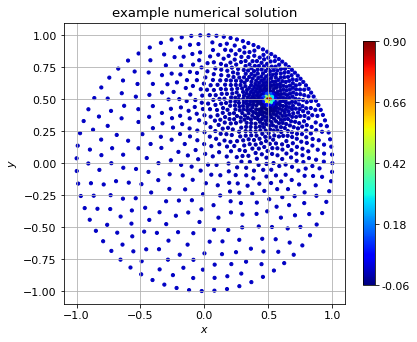

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

p = ax.scatter(positions[0], positions[1], c = solution_phs, s=10,  cmap = 'jet')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True, which='both')
ax.set_title('example numerical solution')
ax.set_aspect('equal')
cbar = fig.colorbar(p, shrink=0.6, ticks = np.linspace(min(solution_phs), max(solution_phs), 5))
cbar.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.linspace(min(solution_phs), max(solution_phs), 5)])

fig.tight_layout()
if 1:
    plt.savefig('../results/example_solution.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

## Plot RBF-FD and WLS nodes

In [135]:
# Define group.
group_id = groups[0]
data_group = data[group_id]

# Obtain node ids.
nodes_phs = data_group['nodes_rbf'][:]
nodes_wls = data_group['nodes_wls'][:]
total_nodes = len(nodes_phs) + len(nodes_wls)
positions_mon = data_group['domain/pos'][:][:,nodes_wls]
positions_phs = data_group['domain/pos'][:][:,nodes_phs]

In [136]:
print("% of WLS nodes: ", len(positions_mon[0]) / total_nodes * 100)
print("% of RBF-FD nodes: ", len(positions_phs[0]) / total_nodes * 100)

% of WLS nodes:  93.4090909090909
% of RBF-FD nodes:  6.59090909090909


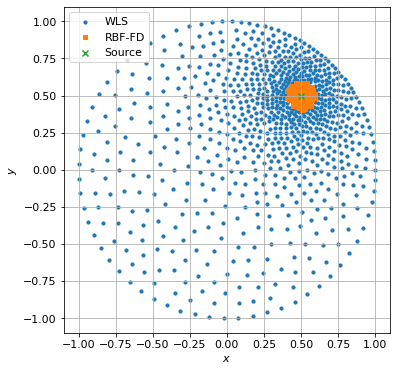

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(positions_mon[0], positions_mon[1], label='WLS', s=10)
ax.scatter(positions_phs[0], positions_phs[1], label='RBF-FD', s=10, marker="s")
ax.scatter(0.5, 0.5, label='Source', marker='x')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True, which='both')
# ax.set_title('approximation variant')
ax.set_aspect('equal')

plt.legend()    

if 1:
    plt.savefig('../results/approximation_engine.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

## Plot convergence rates

In [138]:
# Print group attribute values.
print(list(data[groups[0]].attrs.keys()))

['N_run_00', 'N_run_01', 'N_run_02', 'N_run_03', 'N_run_04', 'N_run_05', 'N_run_06', 'N_run_07', 'N_run_08', 'N_run_09', 'N_run_10', 'N_run_11', 'N_run_12', 'N_run_13', 'N_run_14', 'N_run_15', 'N_run_16', 'N_run_17', 'N_run_18', 'N_run_19', 'N_run_20', 'N_run_21', 'N_run_22', 'N_run_23', 'N_run_24', 'N_run_25', 'N_run_26', 'N_run_27', 'N_run_28', 'N_run_29', 'N_run_30', 'N_run_31', 'N_run_32', 'N_run_33', 'N_run_34', 'N_run_35', 'N_run_36', 'N_run_37', 'N_run_38', 'N_run_39', 'N_run_40', 'N_run_41', 'N_run_42', 'N_run_43', 'N_run_44', 'N_run_45', 'N_run_46', 'N_run_47', 'N_run_48', 'N_run_49', 'N_run_50', 'N_run_51', 'N_run_52', 'N_run_53', 'N_run_54', 'N_run_55', 'N_run_56', 'N_run_57', 'N_run_58', 'N_run_59', 'N_run_60', 'N_run_61', 'N_run_62', 'N_run_63', 'N_run_64', 'N_run_65', 'N_run_66', 'N_run_67', 'N_run_68', 'N_run_69', 'N_run_70', 'N_run_71', 'N_run_72', 'N_run_73', 'N_run_74', 'N_run_75', 'N_run_76', 'N_run_77', 'N_run_78', 'N_run_79', 'N_run_80', 'N_run_81', 'N_run_82', 'N_

### Plot convergence rates

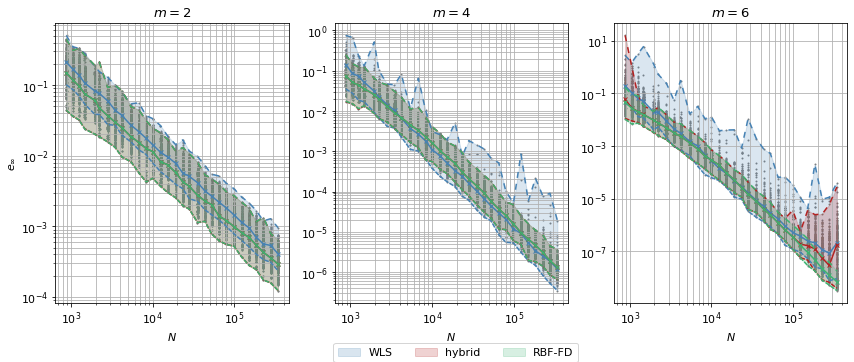

In [139]:
dim = 2
r = 0.15
mon_degrees = [2, 4, 6]
error_type = 'linf' # 'l1', 'l2' or 'linf'
line_colors = ['steelblue', 'firebrick', 'mediumseagreen']

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for mon_degree, ax in zip(mon_degrees, axs):
    # Import data.
    data_filepath = '../data/results_dim_{}_conv_r{}_m{}.h5'.format(dim, r, mon_degree)
    data = h5.File(data_filepath, 'r')

    # Obtain HDf groups.
    groups = list(data.keys())
    groups.remove('conf')
    # print(groups)

    # Parse HDF group to get data.
    N_runs = sum(map(lambda x: 'N_run_' in x, list(data[groups[0]].attrs.keys())))
    data_N = [[data[group].attrs['N_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_mon_1 = [[data[group].attrs['err_norm_1_mon_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_mon_2 = [[data[group].attrs['err_norm_2_mon_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_mon_inf = [[data[group].attrs['err_norm_inf_mon_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_phs_1 = [[data[group].attrs['err_norm_1_phs_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_phs_2 = [[data[group].attrs['err_norm_2_phs_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_phs_inf = [[data[group].attrs['err_norm_inf_phs_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_hybrid_1 = [[data[group].attrs['err_norm_1_hybrid_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_hybrid_2 = [[data[group].attrs['err_norm_2_hybrid_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_hybrid_inf = [[data[group].attrs['err_norm_inf_hybrid_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    data_nps = [data[group].attrs['nodes_per_side'] for group in groups]

    if (error_type == 'linf'): 
        err_phs = err_phs_inf
        err_mon = err_mon_inf
        err_hybrid = err_hybrid_inf
    elif (error_type == 'l1'): 
        err_phs = err_phs_1
        err_mon = err_mon_1
        err_hybrid = err_hybrid_1
    elif (error_type == 'l2'): 
        err_phs = err_phs_2
        err_mon = err_mon_2
        err_hybrid = err_hybrid_2
    else:
        print('Unexpected error type "%s" chosen.' % error_type)

    N_mean = np.mean(data_N, axis=1)
    # Plot.
    for basis, line_color in zip(['mon', 'hybrid', 'phs'], line_colors):
        if (basis == 'phs'):
            err = err_phs
        elif (basis == 'mon'):
            err = err_mon
        elif (basis == 'hybrid'):
            err = err_hybrid
        else:    
            print('Unexpected basis type "%s" chosen.' % basis)

        # All cases marked with dots.
        ax.scatter(data_N, err, c='gray', s=1)
        # Error median.
        error_median = np.median(err, axis=1)
        ax.plot(N_mean, error_median, '-x', color=line_color, ms=4)
        # Error min.
        error_min = np.min(err, axis=1)
        ax.plot(N_mean, error_min, linestyle=(0, (3, 1)), color=line_color)
        # Error max.
        error_max = np.max(err, axis=1)
        ax.plot(N_mean, error_max, linestyle=(0, (4, 4)), color=line_color)
        # Fill between.
        line_label = 'WLS' if basis == 'mon' else 'RBF-FD' if basis == 'phs' else 'hybrid'
        ax.fill_between(N_mean, error_min, error_max, color=line_color, alpha=0.2, label='{}'.format(line_label))
        ax.grid(True, which="both")

    # Plot properties.
    ax.set_xscale('log')
    ax.set_yscale('log')
    if mon_degree == 2:
        if error_type == 'l1':
            ax.set_ylabel("$e_1$")
        elif error_type == 'l2':
            ax.set_ylabel("$e_2$")
        elif error_type == 'linf':
            ax.set_ylabel("$e_\infty$")
        else:
            raise ValueError('Unexpected y label.')
    ax.set_xlabel("$N$")
    ax.set_title("$m={}$".format(mon_degree))
fig.subplots_adjust(bottom=0.15)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.39, 0), ncol=3) 
fig.tight_layout()

if 1:
    plt.savefig('../results/convergence_rates.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

### Plot spread

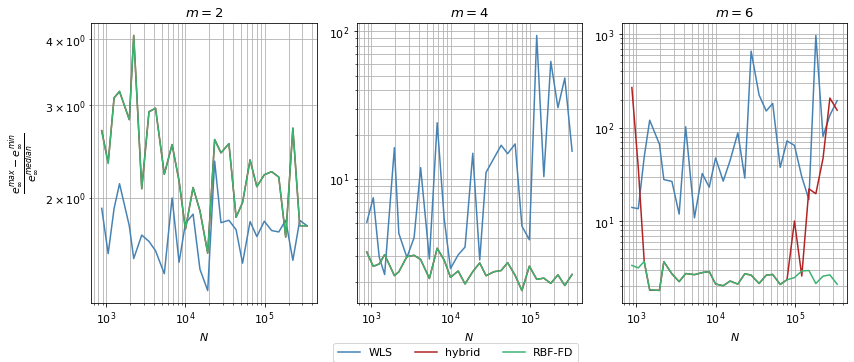

In [140]:
dim = 2
r = 0.15
mon_degrees = [2, 4, 6]
error_type = 'linf' # 'l1', 'l2' or 'linf'
line_colors = ['steelblue', 'firebrick', 'mediumseagreen']

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for mon_degree, ax in zip(mon_degrees, axs):
    # Import data.
    data_filepath = '../data/results_dim_{}_conv_r{}_m{}.h5'.format(dim, r, mon_degree)
    data = h5.File(data_filepath, 'r')

    # Obtain HDf groups.
    groups = list(data.keys())
    groups.remove('conf')
    # print(groups)

    # Parse HDF group to get data.
    N_runs = sum(map(lambda x: 'N_run_' in x, list(data[groups[0]].attrs.keys())))
    data_N = [[data[group].attrs['N_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_mon_1 = [[data[group].attrs['err_norm_1_mon_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_mon_2 = [[data[group].attrs['err_norm_2_mon_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_mon_inf = [[data[group].attrs['err_norm_inf_mon_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_phs_1 = [[data[group].attrs['err_norm_1_phs_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_phs_2 = [[data[group].attrs['err_norm_2_phs_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_phs_inf = [[data[group].attrs['err_norm_inf_phs_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_hybrid_1 = [[data[group].attrs['err_norm_1_hybrid_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_hybrid_2 = [[data[group].attrs['err_norm_2_hybrid_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    err_hybrid_inf = [[data[group].attrs['err_norm_inf_hybrid_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    data_nps = [data[group].attrs['nodes_per_side'] for group in groups]

    if (error_type == 'linf'): 
        err_phs = err_phs_inf
        err_mon = err_mon_inf
        err_hybrid = err_hybrid_inf
    elif (error_type == 'l1'): 
        err_phs = err_phs_1
        err_mon = err_mon_1
        err_hybrid = err_hybrid_1
    elif (error_type == 'l2'): 
        err_phs = err_phs_2
        err_mon = err_mon_2
        err_hybrid = err_hybrid_2
    else:
        print('Unexpected error type "%s" chosen.' % error_type)

    N_mean = np.mean(data_N, axis=1)
    # Plot.
    for basis, line_color in zip(['mon', 'hybrid', 'phs'], line_colors):
        if (basis == 'phs'):
            err = err_phs
        elif (basis == 'mon'):
            err = err_mon
        elif (basis == 'hybrid'):
            err = err_hybrid
        else:    
            print('Unexpected basis type "%s" chosen.' % basis)

        # Error median.
        error_median = np.median(err, axis=1)
        # Error min.
        error_min = np.min(err, axis=1)
        # Error max.
        error_max = np.max(err, axis=1)

        line_label = 'WLS' if basis == 'mon' else 'RBF-FD' if basis == 'phs' else 'hybrid'
        ax.plot(N_mean, (error_max - error_min) / error_median, c = line_color, label='{}'.format(line_label))
        ax.grid(True, which="both")

    # Plot properties.
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("$N$")
    if (ax == axs[0]):
        ax.set_ylabel(r'$ \dfrac{e^{max}_\infty - e^{min}_\infty}{e_{\infty}^{median}}$')
    ax.set_title("$m={}$".format(mon_degree))
fig.subplots_adjust(bottom=0.15)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc = (0.39, 0), ncol=3) 
fig.tight_layout()

if 1:
    plt.savefig('../results/spreads.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

### Plot times

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


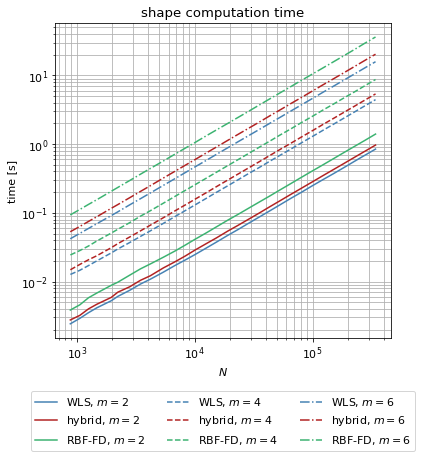

In [4]:
dim = 2
r = 0.2
mon_degrees = [2, 4, 6]
line_colors = ['steelblue', 'firebrick', 'mediumseagreen']
line_types = ['-', '--', '-.']

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# for mon_degree, ax in zip(mon_degrees, axs):
for mon_degree, line_type in zip(mon_degrees, line_types):
    # Import data.
    data_filepath = '../data/results_dim_{}_r{}_m{}.h5'.format(dim, r, mon_degree)
    data = h5.File(data_filepath, 'r')

    # Obtain HDf groups.
    groups = list(data.keys())
    groups.remove('conf')

    # Parse HDF group to get data.
    N_runs = sum(map(lambda x: 'N_run_' in x, list(data[groups[0]].attrs.keys())))
    data_N = [[data[group].attrs['N_run_{:02d}'.format(i)] for i in range(N_runs)] for group in groups]
    times_shape_to_matrix_phs = [[data[group]['time'].attrs['shapes_{}_run_{:03d}-matrix_{}_run_{:03d}'.format('phs', i, 'phs', i)] for i in range(N_runs)] for group in groups]
    times_shape_to_matrix_mon = [[data[group]['time'].attrs['shapes_{}_run_{:03d}-matrix_{}_run_{:03d}'.format('mon', i, 'mon', i)] for i in range(N_runs)] for group in groups]
    times_shape_to_matrix_hybrid = [[data[group]['time'].attrs['shapes_{}_run_{:03d}-matrix_{}_run_{:03d}'.format('hybrid', i, 'hybrid', i)] for i in range(N_runs)] for group in groups]

    N_mean = np.mean(data_N, axis=1)
    # Plot.
    for basis, line_color in zip(['mon', 'hybrid', 'phs'], line_colors):
        if (basis == 'phs'):
            times = times_shape_to_matrix_phs
        elif (basis == 'mon'):
            times = times_shape_to_matrix_mon
        elif (basis == 'hybrid'):
            times = times_shape_to_matrix_hybrid
        else:    
            print('Unexpected basis type "%s" choosen.' % basis)
        
        # Error median.
        times_median = np.median(times, axis=1)
        line_label = 'WLS' if basis == 'mon' else 'RBF-FD' if basis == 'phs' else 'hybrid'
        ax.plot(N_mean, times_median, ls=line_type, color=line_color, ms=4, label="{}, $m={}$".format(line_label, mon_degree))
ax.grid(True, which="both")

# Plot properties.
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$N$")
ax.set_ylabel("time [s]")
ax.set_title("shape computation time")
# Create the figure
# ax.set_ylim(1e-3, 1e3)

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# fig.subplots_adjust(bottom=0.15)
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc = 'bottom', ncol=3) 
fig.tight_layout()

if 1:
    plt.savefig('../results/shape_computation_times.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()